interactive(children=(IntSlider(value=4910, description='x_max', max=10000, min=10, step=100), FloatSlider(val…

Canvas(header_visible=False, toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Bac…
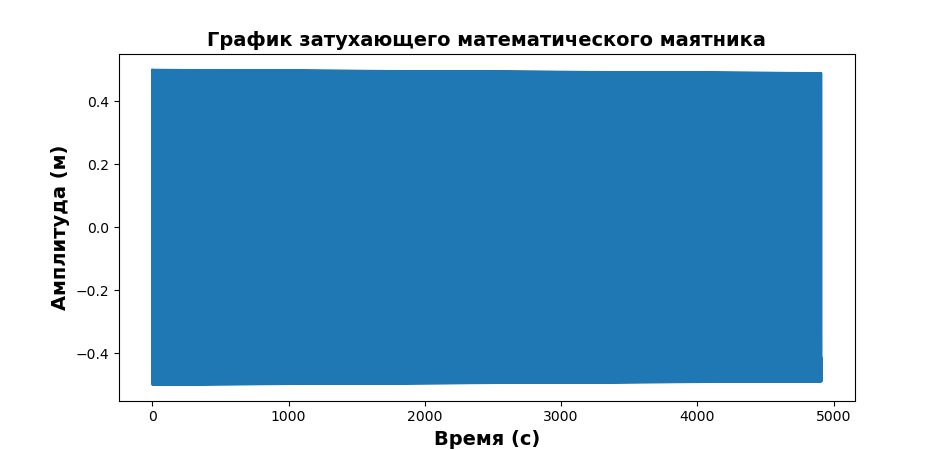

In [28]:
# подключаем widget бэкенд matplotlib как встроенного бэкенда,
# что позволяет выводить графики в этом же ноутбуке под кодом,
# а также дает инструментарий для манипулияций с графикм (зумы, передвижение)
%matplotlib widget

# подключение интерфейса ползунков из библиотеки пользовательских интерфейсов
from ipywidgets import interact
# импортируем модуль pyplot для построения графиков из библиотеки matplotlib
import matplotlib.pyplot as plt
# создание переменной fig, являющейся экземпляром объекта figure - это холст для графиков
fig = plt.figure()
# создание переменной ax, являющейся экземпляром объекта axec - это двухмерный график с осями
ax = fig.add_subplot()
# уберем заголовок "холста"
fig.canvas.header_visible = False
# 
fig.set_figheight(4.5)
fig.set_figwidth(9.5)
# оба объекта объявляем как глобальные переменные, что бы это был один холст графика, на котором будем чертить
global ax, fig
# импортируем библиотеку математических вычислений numpy
import numpy as np

# декоратор, оборачиваем функцию построения маятника в функцию интерактивного ползунка
# задаем диапазоны (min, max, step)
# beta - характеристика среды определяющая насколько сильным будет затухание
# m_pend - масса тела на подвесе
# lenght_pend - длина подвеса математического маятника
@interact (x_max=(10, 10000, 100), d_pend = (0.001, 0.5, 0.001), m_pend = (0.1, 10, 0.1), lenght_pend = (0.1, 10, 0.1))

# ключевой инструкцией def определяем функцию с параметрами
def mpendl(x_max, d_pend, m_pend, lenght_pend):
# очищаем "холст" от предыдщего варианта графика, что бы рисовать новый
    ax.clear()
# часть задания начальных условий
# начальное положение маятника, начальная амплитуда
    y0 = 0.5
# ускорение свободного падения
    g = 9.81
# основная частота - частота иделального маятника без затуханий
    omega0 = np.sqrt(g/lenght_pend)
# характеристика затухания маятника
    n_sredy = 1.8*10**(-5)
    beta = 3*np.pi*d_pend*n_sredy
    delta = beta / (2*m_pend)
# для расчета количества точек использована теорема о погрешности для кусочно-линейной интерполяции
# |f(x) - F(x)| ≤ M2 h**2/2, так как метод plot в mayplot соединияет точки линиями
# eps - задаваемая относительная погрешность
    eps = 0.001
# тогда количество точек будет
    n_point = int(omega0*x_max*np.sqrt(1/(2*eps)))
# расчетная часть
# создается одномерный массив значений по оси x (нач.знач, конеч.знач, количество значений)
    x = np.linspace(0, x_max, n_point)
# расчет массива значений оси у по формулам математического затухающего маятника
    y = y0*np.exp(-delta*x)*np.cos(np.sqrt(omega0**2 - delta**2)*x)
# подписываем ось абцисс
    ax.set_xlabel('Время (с)', fontsize = 14, fontweight = 'bold')
# подписываем ось оридинат
    ax.set_ylabel('Амплитуда (м)', fontsize = 14, fontweight = 'bold')
# подпишем график
    ax.set_title('График затухающего математического маятника', fontsize = 14, fontweight = 'bold')
# построение графика по рассчитанным массивам значний
    ax.plot(x, y)